In [2]:
import asyncio
import websockets
import json
import pandas as pd
import nest_asyncio
import matplotlib.pyplot as plt
nest_asyncio.apply()
import warnings
import numpy as np
import datetime
warnings.filterwarnings("ignore")

# Первый метод

In [ ]:
# To subscribe to this channel:
msg = \
    {"jsonrpc": "2.0",
     "method": "public/subscribe",
     "id": 42,
     "params": {
        "channels": ["markprice.options.btc_usd"]}
    }
# собираем ответы 
# просто код примера с сайте deribit-а
responses = []
async def call_api(msg):
    async with websockets.connect('wss://test.deribit.com/ws/api/v2') as websocket:
        await websocket.send(msg)
        while websocket.open:
            response = await websocket.recv()
            responses.append(response)
            
asyncio.get_event_loop().run_until_complete(call_api(json.dumps(msg)))

In [ ]:
parsed = []
columns = ["timestamp", "mark_price", "iv", "instrument_name"]
data = pd.DataFrame(columns=columns)
for response in responses:
    resp_json = json.loads(response)
    try:
        singles = resp_json["params"]["data"]
    except:
        continue
    for single in singles:
        data = data.append(pd.DataFrame([[single["timestamp"], single["mark_price"], single["iv"], single["instrument_name"]]], columns=columns))
    

In [ ]:
data["human_timestamp"] = data["timestamp"].apply(lambda x : datetime.datetime.fromtimestamp(x/1000.0).strftime('%Y-%m-%d %H:%M:%S.%f'))


In [ ]:
sample = data[data["instrument_name"] == data.instrument_name.sample(1).iloc[0]]
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(sample["human_timestamp"], sample["mark_price"])
ax0.set_title("mark_price")
ax1.plot(sample["human_timestamp"], sample["iv"])
ax1.set_title("iv")
plt.show()


In [ ]:
sample.sort_values(by = "timestamp").drop_duplicates().tail(10)

In [ ]:
data.to_pickle("options.pkl")

# Второй метод

## Соберем все id-щники и опционы, которым они соответсвуют

In [4]:
msg = \
{
  "jsonrpc" : "2.0",
  # "id" : 7617,
  "method" : "public/get_instruments",
  "params" : {
    "currency" : "BTC",
    "kind" : "option",
    "expired" : False
  }
}

async def call_api(msg):
    async with websockets.connect('wss://test.deribit.com/ws/api/v2') as websocket:
        await websocket.send(msg)
        while websocket.open:
            response = await websocket.recv()
            return json.loads(response)


instruments = asyncio.get_event_loop().run_until_complete(call_api(json.dumps(msg)))
instruments_df = []
for instrument in instruments["result"]:
    instruments_df.append([instrument["instrument_name"], instrument["instrument_id"]])
instruments_df = pd.DataFrame(instruments_df, columns = ["instrument_name", "instrument_id"])


In [17]:
instruments_df.sort_values(by = "instrument_id").head(8)

,instrument_name,instrument_id
182,BTC-30DEC22-20000-C,124944
204,BTC-30DEC22-55000-C,124947
199,BTC-30DEC22-40000-P,125045
189,BTC-30DEC22-25000-P,125064
217,BTC-30DEC22-200000-P,125088
195,BTC-30DEC22-30000-P,125129
213,BTC-30DEC22-100000-P,125144
205,BTC-30DEC22-55000-P,125162


## Собираем данные по конкретному опциону

In [114]:
single_strike

,instrument_name,instrument_id
106,BTC-4NOV22-15000-C,139471
107,BTC-4NOV22-15000-P,139472
108,BTC-4NOV22-16000-C,139563
109,BTC-4NOV22-16000-P,139564
110,BTC-4NOV22-17000-C,139559
111,BTC-4NOV22-17000-P,139560
112,BTC-4NOV22-18000-C,139473
113,BTC-4NOV22-18000-P,139474
114,BTC-4NOV22-19000-C,139475
115,BTC-4NOV22-19000-P,139476


In [129]:
int("BTC-31MAR23-10000-P".split("-")[2])

10000

In [126]:
single_strike

,instrument_name,instrument_id
219,BTC-31MAR23-10000-P,130437
221,BTC-31MAR23-15000-P,128769
223,BTC-31MAR23-16000-P,131282
225,BTC-31MAR23-18000-P,131284
227,BTC-31MAR23-20000-P,128477
229,BTC-31MAR23-22000-P,131286
231,BTC-31MAR23-24000-P,131288
233,BTC-31MAR23-25000-P,126282
235,BTC-31MAR23-26000-P,131447
237,BTC-31MAR23-28000-P,132160


In [138]:
single_strike

,instrument_name,instrument_id
174,BTC-30DEC22-10000-C,130486
175,BTC-30DEC22-10000-P,130487
176,BTC-30DEC22-15000-C,130251
177,BTC-30DEC22-15000-P,130252
178,BTC-30DEC22-16000-C,131275
179,BTC-30DEC22-16000-P,131276
180,BTC-30DEC22-18000-C,131277
181,BTC-30DEC22-18000-P,131278
182,BTC-30DEC22-20000-C,124944
183,BTC-30DEC22-20000-P,125375


In [160]:
single_strike

,instrument_name,instrument_id
174,BTC-30DEC22-10000-C,130486
175,BTC-30DEC22-10000-P,130487
176,BTC-30DEC22-15000-C,130251
177,BTC-30DEC22-15000-P,130252
178,BTC-30DEC22-16000-C,131275
179,BTC-30DEC22-16000-P,131276
180,BTC-30DEC22-18000-C,131277
181,BTC-30DEC22-18000-P,131278
182,BTC-30DEC22-20000-C,124944
183,BTC-30DEC22-20000-P,125375


In [159]:
single_strike_ids

[130486,
 130487,
 130251,
 130252,
 131275,
 131276,
 131277,
 131278,
 124944,
 125375,
 131279,
 131280,
 131321,
 131322,
 125644,
 125064,
 131477,
 131478,
 132163,
 132164,
 125283,
 125129,
 125287,
 125195,
 125339,
 125045,
 125269,
 125482,
 125548,
 125645,
 124947,
 125162,
 125310,
 125609,
 133176,
 133177,
 133178,
 133179,
 125627,
 125144,
 125382,
 125208,
 125397,
 125088]

[{'jsonrpc': '2.0', 'id': 130486, 'result': {'underlying_price': 19195.34, 'underlying_index': 'BTC-30DEC22', 'timestamp': 1666460081279, 'stats': {'volume': None, 'price_change': None, 'low': None, 'high': None}, 'state': 'open', 'settlement_price': 0.5652745, 'open_interest': 5.5, 'min_price': 0.5075, 'max_price': 0.6475, 'mark_price': 0.5652, 'mark_iv': 210.0, 'last_price': 0.514, 'interest_rate': 0.0, 'instrument_name': 'BTC-30DEC22-10000-C', 'index_price': 19182.54, 'greeks': {'vega': 16.71592, 'theta': -25.58534, 'rho': 11.33268, 'gamma': 1e-05, 'delta': 0.87929}, 'estimated_delivery_price': 19182.54, 'change_id': 14532404577, 'bids': [], 'bid_iv': 0.0, 'best_bid_price': 0.0, 'best_bid_amount': 0.0, 'best_ask_price': 0.5575, 'best_ask_amount': 0.1, 'asks': [[0.5575, 0.1]], 'ask_iv': 201.13}, 'usIn': 1666460081862348, 'usOut': 1666460081862492, 'usDiff': 144, 'testnet': True}]
[{'jsonrpc': '2.0', 'id': 130487, 'result': {'underlying_price': 19195.28, 'underlying_index': 'BTC-30DEC

[{'jsonrpc': '2.0', 'id': 131279, 'result': {'underlying_price': 19194.94, 'underlying_index': 'BTC-30DEC22', 'timestamp': 1666460085308, 'stats': {'volume': None, 'price_change': None, 'low': None, 'high': None}, 'state': 'open', 'settlement_price': 0.112348, 'open_interest': 1961.3, 'min_price': 0.061, 'max_price': 0.191, 'mark_price': 0.1139, 'mark_iv': 96.46, 'last_price': 0.0655, 'interest_rate': 0.0, 'instrument_name': 'BTC-30DEC22-22000-C', 'index_price': 19182.06, 'greeks': {'vega': 32.97158, 'theta': -23.182, 'rho': 12.249, 'gamma': 5e-05, 'delta': 0.45341}, 'estimated_delivery_price': 19182.06, 'change_id': 14555068503, 'bids': [[0.047, 10.0]], 'bid_iv': 56.35, 'best_bid_price': 0.047, 'best_bid_amount': 10.0, 'best_ask_price': 0.22, 'best_ask_amount': 10.0, 'asks': [[0.22, 10.0]], 'ask_iv': 158.01}, 'usIn': 1666460086305213, 'usOut': 1666460086305352, 'usDiff': 139, 'testnet': True}]
[{'jsonrpc': '2.0', 'id': 131280, 'result': {'underlying_price': 19194.92, 'underlying_index

[{'jsonrpc': '2.0', 'id': 125283, 'result': {'underlying_price': 19195.0, 'underlying_index': 'BTC-30DEC22', 'timestamp': 1666460090343, 'stats': {'volume': None, 'price_change': None, 'low': None, 'high': None}, 'state': 'open', 'settlement_price': 0.02104651, 'open_interest': 639.9, 'min_price': 0.0045, 'max_price': 0.0685, 'mark_price': 0.0223, 'mark_iv': 82.37, 'last_price': 0.013, 'interest_rate': 0.0, 'instrument_name': 'BTC-30DEC22-30000-C', 'index_price': 19181.95, 'greeks': {'vega': 18.68849, 'theta': -11.21935, 'rho': 4.31283, 'gamma': 3e-05, 'delta': 0.14186}, 'estimated_delivery_price': 19181.95, 'change_id': 14549729582, 'bids': [[0.004, 10.0]], 'bid_iv': 56.25, 'best_bid_price': 0.004, 'best_bid_amount': 10.0, 'best_ask_price': 0.0, 'best_ask_amount': 0.0, 'asks': [], 'ask_iv': 0.0}, 'usIn': 1666460090362751, 'usOut': 1666460090362955, 'usDiff': 204, 'testnet': True}]
[{'jsonrpc': '2.0', 'id': 125129, 'result': {'underlying_price': 19195.0, 'underlying_index': 'BTC-30DEC2

[{'jsonrpc': '2.0', 'id': 124947, 'result': {'underlying_price': 19194.9, 'underlying_index': 'BTC-30DEC22', 'timestamp': 1666460093364, 'stats': {'volume': None, 'price_change': None, 'low': None, 'high': None}, 'state': 'open', 'settlement_price': 0.00023003, 'open_interest': 978.7, 'min_price': 0.0001, 'max_price': 0.015, 'mark_price': 0.0003, 'mark_iv': 82.37, 'last_price': 0.002, 'interest_rate': 0.0, 'instrument_name': 'BTC-30DEC22-55000-C', 'index_price': 19181.75, 'greeks': {'vega': 0.71713, 'theta': -0.43052, 'rho': 0.09141, 'gamma': 0.0, 'delta': 0.00281}, 'estimated_delivery_price': 19181.75, 'change_id': 14548707150, 'bids': [], 'bid_iv': 0.0, 'best_bid_price': 0.0, 'best_bid_amount': 0.0, 'best_ask_price': 0.0, 'best_ask_amount': 0.0, 'asks': [], 'ask_iv': 0.0}, 'usIn': 1666460094364303, 'usOut': 1666460094364421, 'usDiff': 118, 'testnet': True}]
[{'jsonrpc': '2.0', 'id': 125162, 'result': {'underlying_price': 19194.87, 'underlying_index': 'BTC-30DEC22', 'timestamp': 16664

[{'jsonrpc': '2.0', 'id': 125382, 'result': {'underlying_price': 19194.67, 'underlying_index': 'BTC-30DEC22', 'timestamp': 1666460098401, 'stats': {'volume': None, 'price_change': None, 'low': None, 'high': None}, 'state': 'open', 'settlement_price': 0.0, 'open_interest': 269.0, 'min_price': 0.0001, 'max_price': 0.015, 'mark_price': 0.0, 'mark_iv': 82.37, 'last_price': 0.001, 'interest_rate': 0.0, 'instrument_name': 'BTC-30DEC22-150000-C', 'index_price': 19181.26, 'greeks': {'vega': 1e-05, 'theta': 0.0, 'rho': 0.0, 'gamma': 0.0, 'delta': 0.0}, 'estimated_delivery_price': 19181.26, 'change_id': 14522359191, 'bids': [], 'bid_iv': 0.0, 'best_bid_price': 0.0, 'best_bid_amount': 0.0, 'best_ask_price': 0.0, 'best_ask_amount': 0.0, 'asks': [], 'ask_iv': 0.0}, 'usIn': 1666460099187514, 'usOut': 1666460099187635, 'usDiff': 121, 'testnet': True}]
[{'jsonrpc': '2.0', 'id': 125208, 'result': {'underlying_price': 19194.95, 'underlying_index': 'BTC-30DEC22', 'timestamp': 1666460099407, 'stats': {'vo

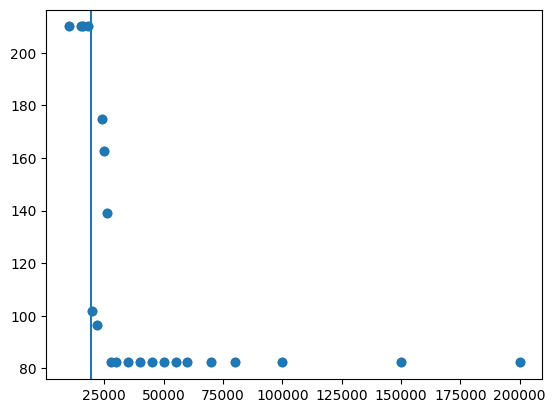

In [153]:
random_instrument = instruments_df.sample(1).iloc[0]["instrument_name"]
single_strike = instruments_df[
    (instruments_df["instrument_name"].str.startswith(random_instrument[0:11])) 
#     (instruments_df["instrument_name"].str.endswith(random_instrument[-1]))
]
single_strike_ids = single_strike.instrument_id.to_list()


async def call_api(op_id, number_of_ticks):
    msg = json.dumps(
    {"jsonrpc": "2.0",
     "method": "public/get_order_book_by_instrument_id",
     # ранломный id опциона из датафрейма выше
     "id": op_id,
     "params": {
        "instrument_id": op_id,
        "depth": 1.0}
    })
    
    prices = []
    counter = 0
#     max_counter = 10
    async with websockets.connect('wss://test.deribit.com/ws/api/v2') as websocket:
        while websocket.open:
            if counter>=number_of_ticks:
                break
            await websocket.send(msg)
            response = await websocket.recv()
            # print(response)
            prices.append(json.loads(response))
            counter+=1
            continue
    return prices

options = []
for op_id in single_strike_ids:
    option = asyncio.get_event_loop().run_until_complete(call_api(op_id = op_id, number_of_ticks = 1))
    print(option)
    options.append(option)
    
ivs = []
strikes = []
for option in options:
    ivs.append(option[0]["result"]["mark_iv"])
    strikes.append(int(option[0]["result"]["instrument_name"].split("-")[2]))
    
# df = pd.DataFrame({"strikes": strikes, "ivs": ivs})
# df = df.sort_values(by = "strikes")
# plt.plot(df["strikes"], df["ivs"])
df = pd.DataFrame("strike": "iv")
plt.scatter(strikes, ivs)
plt.axvline(x=option[0]["result"]["underlying_price"])
plt.show()

In [157]:
df[df["strike"]<=30_000]

,strike,iv
0,10000,210.00
1,10000,210.00
2,15000,210.00
3,15000,210.00
4,16000,210.00
5,16000,210.00
6,18000,210.00
7,18000,210.00
8,20000,101.80
9,20000,101.80


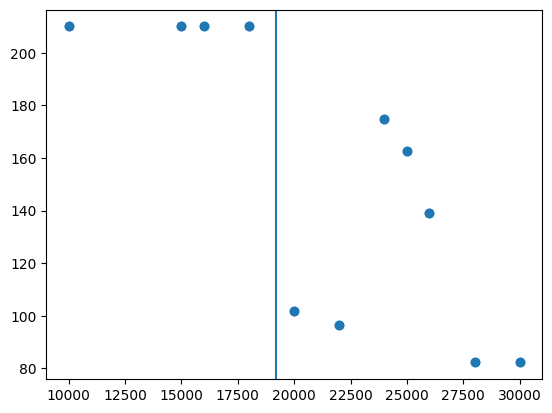

In [158]:
df = pd.DataFrame({"strike":strikes,  "iv": ivs})
to_plot = df[df["strike"]<=30_000]
plt.scatter(to_plot["strike"], to_plot["iv"])
plt.axvline(x=option[0]["result"]["underlying_price"])
plt.show()

In [152]:
single_strike

,instrument_name,instrument_id
0,BTC-23OCT22-15000-C,140054
1,BTC-23OCT22-15000-P,140055
2,BTC-23OCT22-16000-C,140056
3,BTC-23OCT22-16000-P,140057
4,BTC-23OCT22-17000-C,140058
5,BTC-23OCT22-17000-P,140059
6,BTC-23OCT22-17500-C,140060
7,BTC-23OCT22-17500-P,140061
8,BTC-23OCT22-18000-C,140062
9,BTC-23OCT22-18000-P,140063


In [150]:
strikes

[15000,
 15000,
 16000,
 16000,
 17000,
 17000,
 17500,
 17500,
 18000,
 18000,
 18250,
 18250,
 18500,
 18500,
 18750,
 18750,
 19000,
 19000,
 19250,
 19250,
 19500,
 19500,
 19750,
 19750,
 20000,
 20000,
 20500,
 20500,
 21000,
 21000,
 22000,
 22000]

In [9]:
df = []
columns = ["instrument_name", "timestamp", "underlying_price", "mark_iv", "mark_price", "best_bid_price", "best_ask_price"]
for result in prices:
    df.append([result["result"]["instrument_name"], 
          result["result"]["timestamp"],
          result["result"]["underlying_price"],
          result["result"]["mark_iv"],  
          result["result"]["mark_price"],
          result["result"]["best_bid_price"],
          result["result"]["best_ask_price"]]) 
df = pd.DataFrame(df, columns = columns)
df["human_timestamp"] = df["timestamp"].apply(lambda x : datetime.datetime.fromtimestamp(x/1000.0).strftime('%Y-%m-%d %H:%M:%S.%f'))
df = df.drop_duplicates()


In [10]:
df

,instrument_name,timestamp,underlying_price,mark_iv,mark_price,best_bid_price,best_ask_price,human_timestamp
0,BTC-29SEP23-40000-P,1666437778531,19301.13,61.49,1.1168,0.0,0.0,2022-10-22 14:22:58.531000
8,BTC-29SEP23-40000-P,1666437779537,19301.10,61.49,1.1168,0.0,0.0,2022-10-22 14:22:59.537000
23,BTC-29SEP23-40000-P,1666437780542,19301.10,61.49,1.1168,0.0,0.0,2022-10-22 14:23:00.542000
38,BTC-29SEP23-40000-P,1666437781549,19300.85,61.49,1.1168,0.0,0.0,2022-10-22 14:23:01.549000
54,BTC-29SEP23-40000-P,1666437782556,19300.53,61.49,1.1168,0.0,0.0,2022-10-22 14:23:02.556000
69,BTC-29SEP23-40000-P,1666437783563,19300.76,61.49,1.1168,0.0,0.0,2022-10-22 14:23:03.563000
84,BTC-29SEP23-40000-P,1666437784571,19300.65,61.49,1.1168,0.0,0.0,2022-10-22 14:23:04.571000
99,BTC-29SEP23-40000-P,1666437785580,19300.57,61.49,1.1168,0.0,0.0,2022-10-22 14:23:05.580000
114,BTC-29SEP23-40000-P,1666437786587,19300.76,61.49,1.1168,0.0,0.0,2022-10-22 14:23:06.587000
130,BTC-29SEP23-40000-P,1666437787593,19300.72,61.49,1.1168,0.0,0.0,2022-10-22 14:23:07.593000


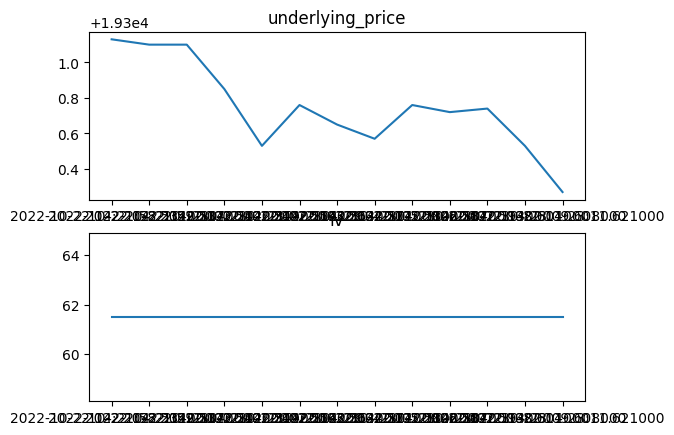

In [12]:
fig, (ax0, ax1) = plt.subplots(2, 1)
# ax0.plot(df["human_timestamp"], df["best_ask_price"])
# ax0.plot(df["human_timestamp"], df["best_bid_price"])
ax0.plot(df["human_timestamp"], df["underlying_price"])

ax0.set_title("underlying_price")
ax1.plot(df["human_timestamp"], df["mark_iv"])
ax1.set_title("iv")
plt.show()


In [13]:
df.to_pickle("data/BTC-29SEP23-40000-P.pkl")